In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/real_estate.csv")
df

<ipython-input-6-169ba10d8875>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/real_estate.csv")


,Date Recorded,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Longitude,Latitude
0,2021-04-14,2020,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,-73.068220,41.350140
1,2021-05-26,2020,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN
2,2021-09-13,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN
3,2020-12-14,2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN
4,2021-09-07,2020,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1054154,2021-11-16,2021,Watertown,50 SUMMIT RIDGE,263100.0,430000.0,0.6118,Residential,Single Family,-73.114797,41.586333
1054155,2022-09-20,2021,Woodbury,89 TAMARACK LANR UNIT 89A,79810.0,200000.0,0.3990,Residential,Condo,-73.232742,41.517140
1054156,2022-05-06,2021,Woodbury,69 BACON POND ROAD,79590.0,360000.0,0.2210,Vacant Land,NaN,-73.191290,41.543605
1054157,2022-06-29,2021,West Haven,114 TUTHILL ST,117600.0,275000.0,0.4276,Residential,Single Family,-72.976177,41.281588


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_date = LabelEncoder()
le_town = LabelEncoder()
le_address = LabelEncoder()
le_property = LabelEncoder()
le_residential = LabelEncoder()

In [ ]:
# label encode categorical values into numerical using one-hot encoding
df['date_n'] = le_date.fit_transform(df['Date Recorded'])
df['town_n'] = le_town.fit_transform(df['Town'])
df['address_n'] = le_address.fit_transform(df['Address'])
df['property_n'] = le_property.fit_transform(df['Property Type'])
df['residential_n'] = le_residential.fit_transform(df['Residential Type'])
df.tail(200)

,Date Recorded,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Longitude,Latitude,date_n,town_n,address_n,property_n,residential_n
1053959,2022-09-28,2021,Woodbury,305 MAIN ST SOUTH,110020.0,595000.0,0.184908,Residential,Single Family,-73.207834,41.540599,6670,168,368231,6,2
1053960,2022-04-27,2021,Waterford,19 BRILL AVENUE,125400.0,310000.0,0.404500,Residential,Single Family,-72.142326,41.349377,6545,152,209509,6,2
1053961,2022-09-23,2021,West Hartford,26 ARNOLD WAY GAR 11A,4340.0,45000.0,0.096400,Residential,Condo,-72.736808,41.764557,6665,154,311306,6,0
1053962,2022-08-01,2021,Wethersfield,65 LINDEN ST,135190.0,50000.0,2.703800,Residential,Single Family,-72.671985,41.701393,6624,159,602304,6,2
1053963,2022-04-27,2021,West Hartford,25 STONEHAM DRIVE,248168.0,435000.0,0.570500,Residential,Single Family,-72.734052,41.791654,6545,154,304546,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054154,2021-11-16,2021,Watertown,50 SUMMIT RIDGE,263100.0,430000.0,0.611800,Residential,Single Family,-73.114797,41.586333,6423,153,525224,6,2
1054155,2022-09-20,2021,Woodbury,89 TAMARACK LANR UNIT 89A,79810.0,200000.0,0.399000,Residential,Condo,-73.232742,41.517140,6662,168,697803,6,0
1054156,2022-05-06,2021,Woodbury,69 BACON POND ROAD,79590.0,360000.0,0.221000,Vacant Land,NaN,-73.191290,41.543605,6553,168,615594,10,5
1054157,2022-06-29,2021,West Haven,114 TUTHILL ST,117600.0,275000.0,0.427600,Residential,Single Family,-72.976177,41.281588,6597,155,59978,6,2


In [ ]:
# check for missing values
print(df.isna().any())

Date Recorded        True
List Year           False
Town                False
Address              True
Assessed Value      False
Sale Amount         False
Sales Ratio         False
Property Type        True
Residential Type     True
Longitude            True
Latitude             True
date_n              False
town_n              False
address_n           False
property_n          False
residential_n       False
dtype: bool


In [ ]:
# fill in Longitude and Latitude with mean for missing values
### Check with TA to see if we can find same town and plug in their info to missing
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)

In [ ]:
# recheck for missing values
print(df['Latitude'].isna().any())
print(df['Longitude'].isna().any())

False
False


In [ ]:
x=df[['List Year', 'Assessed Value', 'Longitude', 'Latitude', 'date_n', 'town_n','address_n', 'property_n', 'residential_n']]
y=df['Sale Amount']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

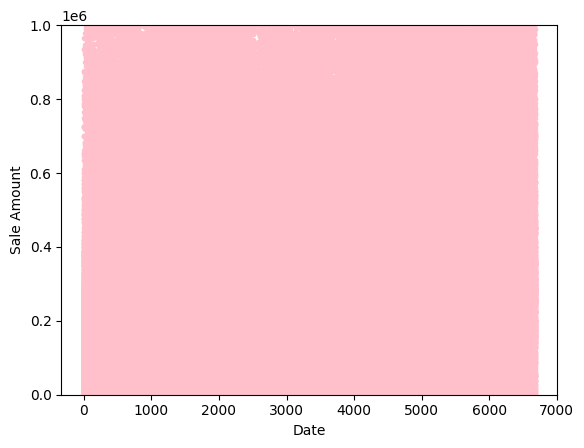

In [ ]:
# Date & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.date_n,y,color='pink',marker='.')
plt.xlabel('Date')
plt.ylabel('Sale Amount')
plt.ylim(0, 1000000)
plt.show()

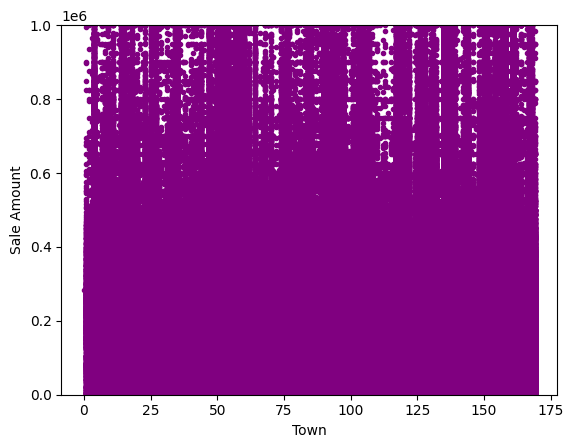

In [ ]:
# Town & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.town_n,y,color='purple',marker='.')
plt.xlabel('Town')
plt.ylabel('Sale Amount')
plt.ylim(0, 1000000)
plt.show()

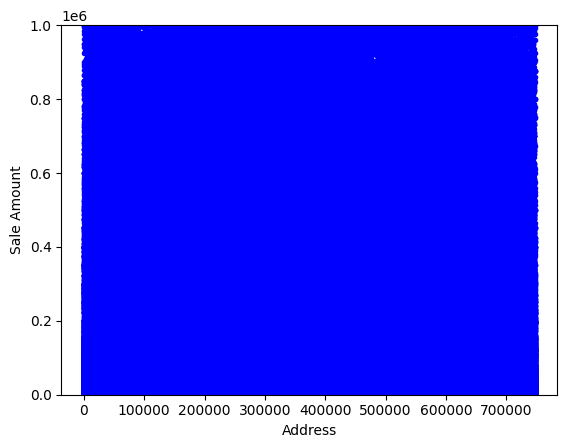

In [ ]:
# Address & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.address_n,y,color='blue',marker='.')
plt.xlabel('Address')
plt.ylabel('Sale Amount')
plt.ylim(0, 1000000)
plt.show()

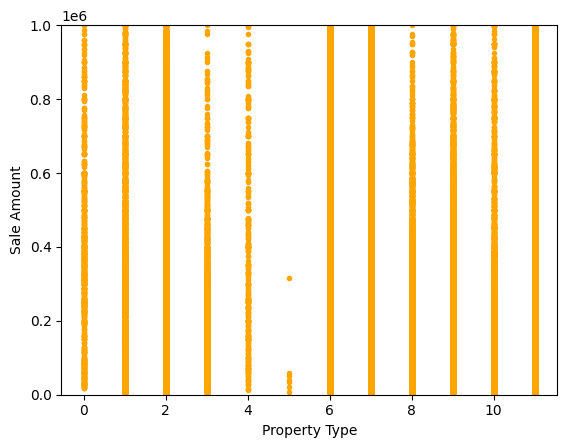

In [ ]:
# Property Type & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.property_n,y,color='orange',marker='.')
plt.xlabel('Property Type')
plt.ylabel('Sale Amount')
plt.ylim(0, 1000000)
plt.show()

In [ ]:
mapping = dict(zip(le_property.classes_, range(len(le_property.classes_))))
print(mapping)
# public utility is 5, seems to make value of property cheap

{'Apartments': 0, 'Commercial': 1, 'Condo': 2, 'Four Family': 3, 'Industrial': 4, 'Public Utility': 5, 'Residential': 6, 'Single Family': 7, 'Three Family': 8, 'Two Family': 9, 'Vacant Land': 10, nan: 11}


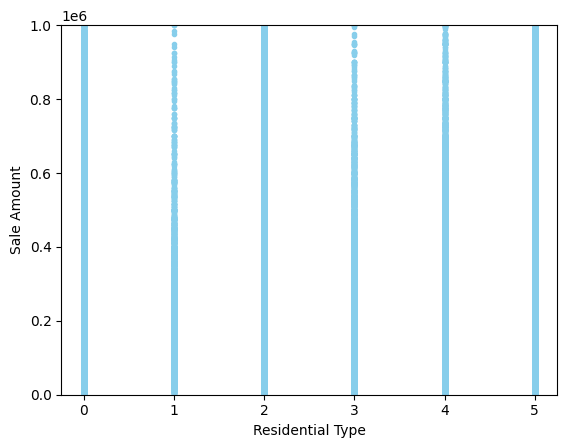

In [ ]:
# Residential Type & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.residential_n,y,color='skyblue',marker='.')
plt.xlabel('Residential Type')
plt.ylabel('Sale Amount')
plt.ylim(0, 1000000)
plt.show()

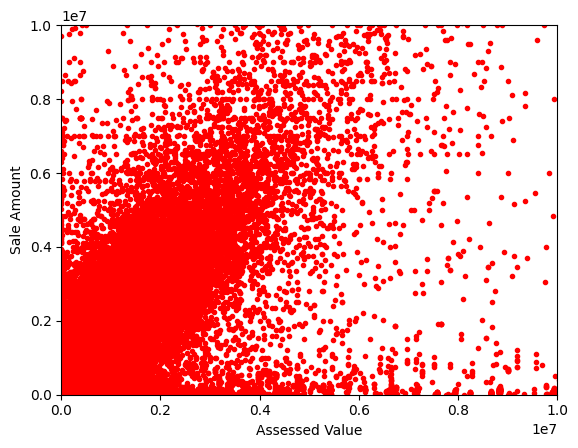

In [ ]:
# Assessed Value & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Assessed Value'],y,color='red',marker='.')
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.xlim(0, 10000000)
plt.ylim(0, 10000000)
plt.show()

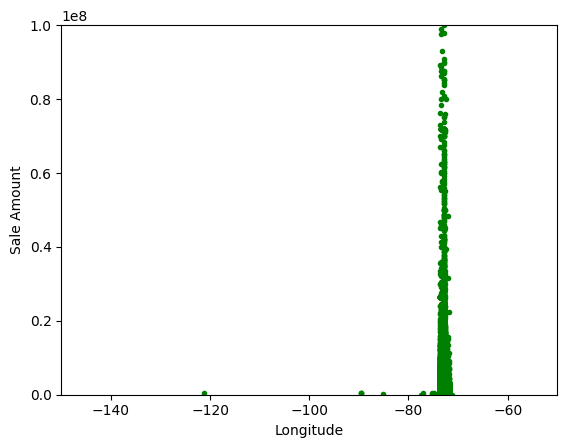

In [ ]:
# Longitude & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Longitude'],y,color='green',marker='.')
plt.xlabel('Longitude')
plt.ylabel('Sale Amount')
plt.xlim(-150, -50)
plt.ylim(0, 100000000)
plt.show()

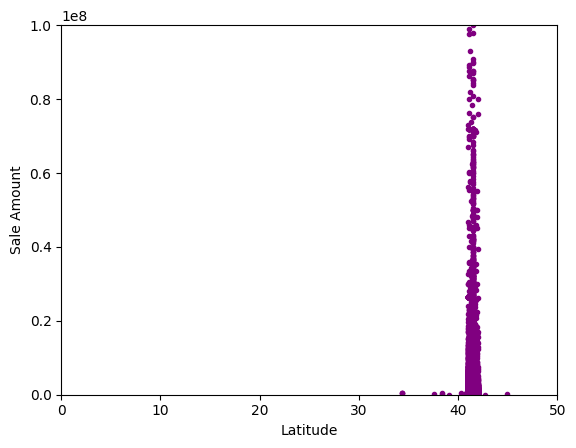

In [ ]:
# Latitude & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Latitude'],y,color='purple',marker='.')
plt.xlabel('Latitude')
plt.ylabel('Sale Amount')
plt.xlim(0, 50)
plt.ylim(0, 100000000)
plt.show()

In [ ]:
mymodel=LinearRegression()
mymodel.fit(x,y)

LinearRegression()

In [ ]:
mymodel.intercept_

96510737.71990561

In [ ]:
# x=df[['List Year', 'Assessed Value', 'Longitude', 'Latitude', 'date_n', 'town_n','address_n', 'property_n', 'residential_n']]
mymodel.coef_

array([-4.71213531e+04,  3.78913285e-01, -1.84353208e+05, -3.71861940e+05,
        1.93476833e+02,  5.44679192e+02, -3.35196084e-02, -8.99176402e+04,
        1.85001259e+05])

In [ ]:
# pred_sales_amount = -4.71213531e+04('List Year') + 3.78913285e-01('Assessed Value') + -1.84353208e+05('Longitude') + -3.71861940e+05('Latitude')
# + 1.93476833e+02('date_n') + 5.44679192e+02('town_n') + -3.35196084e-02('address_n') + -8.99176402e+04('property_n') + 1.85001259e+05('residential_n')
# + 96510737.71990561